In [1]:

import matplotlib.pyplot as plt
import numpy as np
import glob
from numpy import linalg as LA
from functools import reduce
import os
import sys
import time
import datetime as dt
import pandas as pd
import geopandas as gpd

In [6]:
sys.path.append('/Users/home/whitefar/DATA/code/RADAR_PROCESSING/')
from process_radar import radarsurvey, radarline

In [7]:
#    survey 5     one segment only
#        L5_R5 2019-12-30 16:51 17:36 11538 06364035101 survey5
        
survey5 = radarsurvey("06364035101")
survey5.load_radar_data("/Volumes/arc_04/FIELD_DATA/K8621920/RES/")
survey5.load_gnss_data()
survey5.interpolate_gnss()
survey5.refine_timesync('21 seconds')
survey5.split_lines_choose(moving_threshold=0.5)
#survey5.split_lines_plot(["line5"])

line5 = radarline(survey5.split_lines_output()[0],"line5")
line5.offset()
# line5.stack_spatially()
#line5.radargram(channel=0,bound=0.008,title='filtered to 2.5e7 Hz',x_axis='space')
line5.export()

loading files from:
/Volumes/arc_04/FIELD_DATA/K8621920/RES/KIS2/30dec/06364035101ch0
/Volumes/arc_04/FIELD_DATA/K8621920/RES/KIS2/30dec/06364035101ch1
/Volumes/arc_04/FIELD_DATA/K8621920/RES/KIS2/30dec/06364035101info.txt
/Volumes/arc_04/FIELD_DATA/K8621920/RES/KIS2/30dec/06364035101time.txt


/Users/home/whitefar/miniconda3/envs/remote_sensing/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


positive dt moves lines left
line has 1 segments of moving, where acc < 0.5
metadata written to /Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/radarline_meta_line5.txt
/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/line5.gpkg


(array([273.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,
          3.,   6.,  26., 100., 286., 350., 342., 309., 349., 286., 214.,
        115.,  30.,   7.,   2.,   1.,   0.,   1.,   2.]),
 array([0.        , 0.10203108, 0.20406216, 0.30609324, 0.40812432,
        0.5101554 , 0.61218648, 0.71421756, 0.81624864, 0.91827972,
        1.0203108 , 1.12234188, 1.22437296, 1.32640404, 1.42843512,
        1.5304662 , 1.63249728, 1.73452836, 1.83655944, 1.93859052,
        2.0406216 , 2.14265268, 2.24468376, 2.34671484, 2.44874592,
        2.550777  , 2.65280808, 2.75483916, 2.85687024, 2.95890132,
        3.0609324 ]),
 <BarContainer object of 30 artists>)

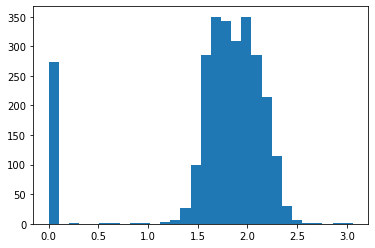

In [14]:
plt.hist(survey5.radata.dx,30)

In [16]:
survey5.radata.dx.mean()

1.687230745164347

In [17]:
survey5.radata.dx.median()

1.82636460298065